In [1]:
print("# Bu projenin hedefi elimizdeki değişkenlere bağlı olarak avokadonun gelecekteki fiyatını tahmin etmek")

# Bu projenin hedefi elimizdeki değişkenlere bağlı olarak avokadonun gelecekteki fiyatını tahmin etmek


In [1]:
# gerekli kütüphaneleri import ediyorum
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [3]:
# veriyi okuyorum
data = pd.read_csv('C:\\Users\\Merve\\Desktop\\avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# veri hakkında bilgi ediniyorum
data.shape

(18249, 14)

In [5]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
# gereksiz olan unnamed değişkenini siliyorum
data = data.drop('Unnamed: 0',axis = 1)
# değişkenlerin isimlerini değiştiriyorum
data = data.rename(index=str, columns={"4046" : "Small Hass", "4225" : "Large Hass","4770" : "XLarge Hass" })
data.head()

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'Small Hass', 'Large Hass',
       'XLarge Hass', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'type', 'year', 'region'],
      dtype='object')

In [8]:
data.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
Small Hass      float64
Large Hass      float64
XLarge Hass     float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [9]:
# veriyi haftalık olarak yeniden örneklendiriyorum
df1 = data.copy(deep = True)
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date',inplace = True)
df1 = df1.resample('W').sum()
df1.head()

,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Date,,,,,,,,,,
2015-01-04,140.54,8.467434e+07,33098258.74,36851038.43,2278818.64,12446221.39,9910008.90,2485655.90,50556.59,217620
2015-01-11,148.03,7.855581e+07,31024164.99,32808429.84,2349167.45,12374044.96,10352936.42,1977832.00,43276.54,217620
2015-01-18,150.24,7.838878e+07,31802706.86,31662041.93,2208250.55,12715784.74,10548854.11,2145586.13,21344.50,217620
2015-01-25,150.89,7.646628e+07,32305132.87,28929122.37,2078378.86,13153646.97,10877316.95,2252815.92,23514.10,217620
2015-02-01,134.68,1.194532e+08,50292988.96,50696230.48,3687489.31,14776526.50,11576833.65,3073989.39,125703.46,217620


In [10]:
# obje türünü de date time türüne dönüştürüyorum
data['Date'] =pd.to_datetime(data.Date)

data.sort_values(by=['Date'], inplace=True, ascending=True)

data.head()

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 11569 to 8814
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   Small Hass    18249 non-null  float64       
 4   Large Hass    18249 non-null  float64       
 5   XLarge Hass   18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.9+ MB


In [12]:
# boş değer var mı diye baktık
data.isnull().sum()
# boş değer yokmuş

Date            0
AveragePrice    0
Total Volume    0
Small Hass      0
Large Hass      0
XLarge Hass     0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
Small Hass,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
Large Hass,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
XLarge Hass,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


In [14]:
# sütunları ayrı değişkenlere atıyorum
numeric_columns = [ 'Total Volume','Small Hass', 'Large Hass', 'XLarge Hass', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
categorical_columns = ['region', 'type',"year"]
time_columns = ['Date']



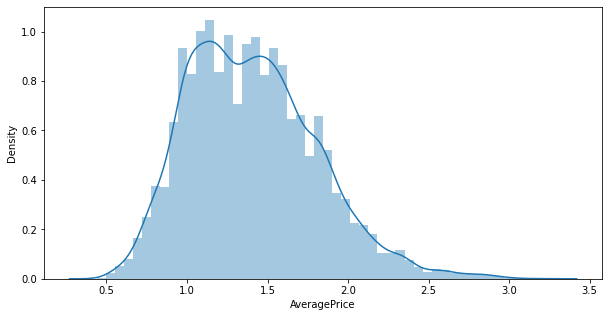

In [20]:
# AveragePrice değişeninin dağılımını inceleyelim

plt.figure(figsize = (10,5))
sns.distplot(data["AveragePrice"])
plt.show()


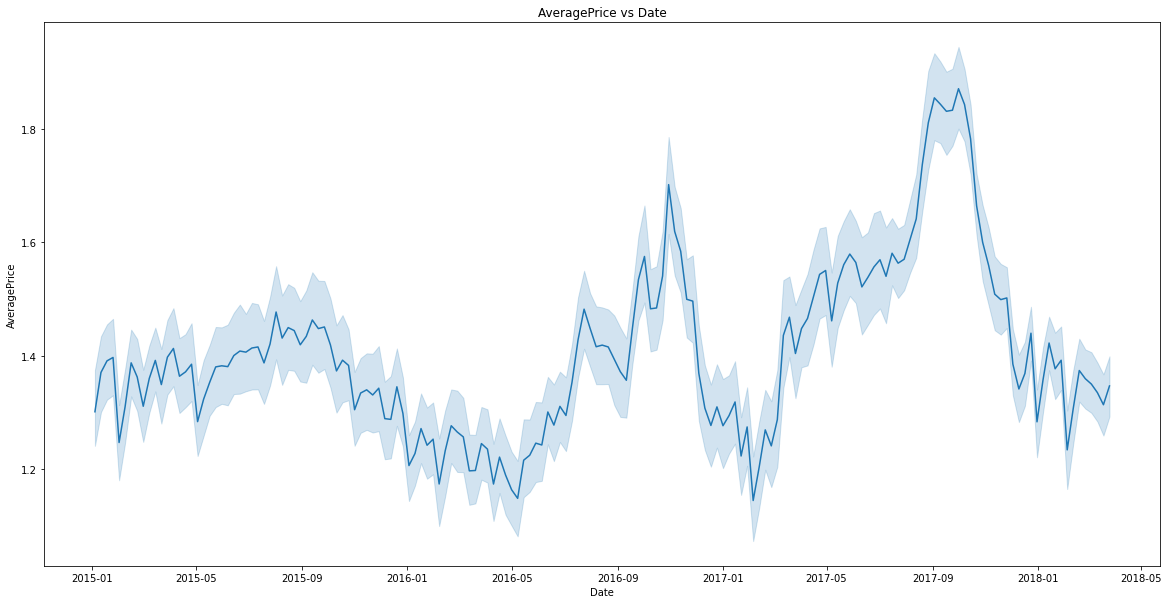

In [21]:
# AveragePrice değişkenin zamana göre dağılımı
plt.figure(figsize=(20,10))
sns.lineplot(x='Date',y="AveragePrice", data=data)
plt.title('AveragePrice vs Date')
plt.show()

In [16]:

data['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

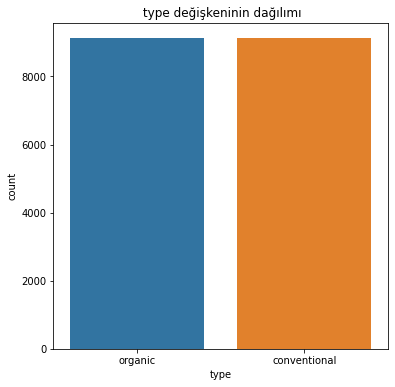

In [17]:
plt.figure(figsize=(6, 6))
plt.title(" type değişkeninin dağılımı")
sns.countplot(x="type",data=data)
plt.show()

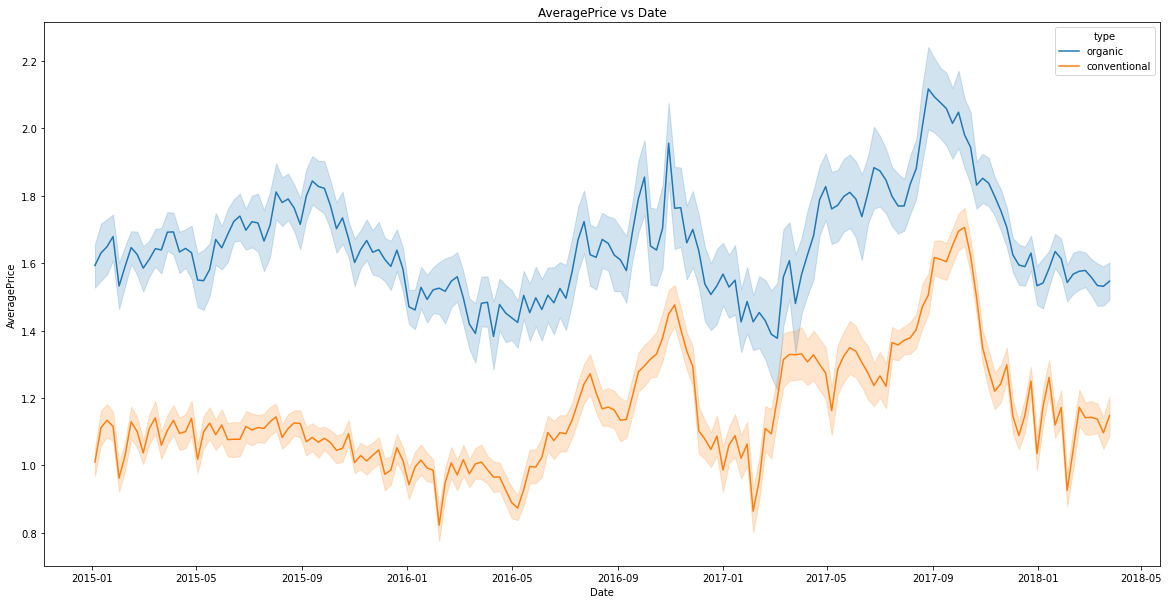

In [22]:
# AveragePrice değişkenin zamana göre dağılımı
plt.figure(figsize=(20,10))
sns.lineplot(x='Date',y="AveragePrice",hue="type", data=data)
plt.title('AveragePrice vs Date')
plt.show()

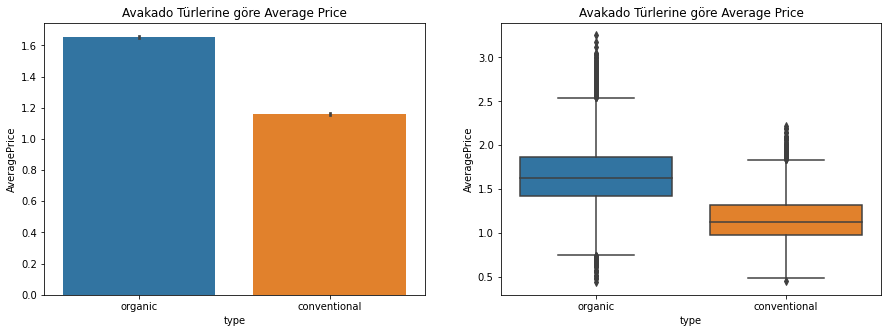

In [25]:
fig,ax = plt.subplots(nrows = 2, ncols = 1,figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Avakado Türlerine göre Average Price")
sns.barplot(x="type",y="AveragePrice",data=data)

plt.subplot(1,2,2)
plt.title("Avakado Türlerine göre Average Price")
sns.boxplot(x="type", y="AveragePrice",data=data)


plt.show()

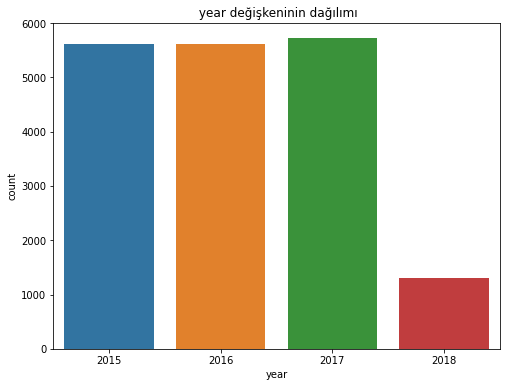

In [23]:
plt.figure(figsize=(8, 6))
plt.title(" year değişkeninin dağılımı")
sns.countplot(x="year",data=data)
plt.show()




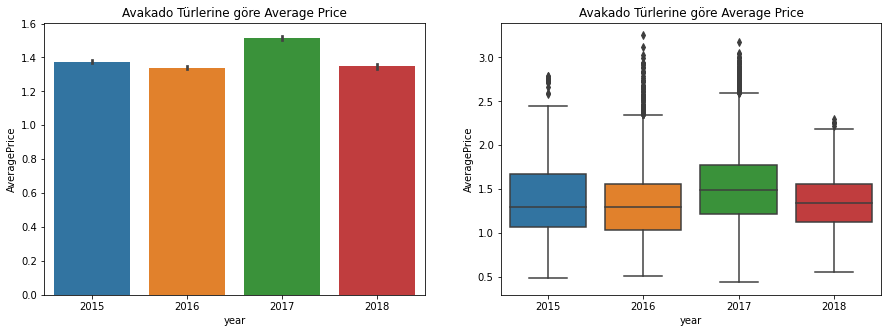

In [26]:

fig,ax = plt.subplots(nrows = 2, ncols = 1,figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Avakado Türlerine göre Average Price")
sns.barplot(x="year",y="AveragePrice",data=data)

plt.subplot(1,2,2)
plt.title("Avakado Türlerine göre Average Price")
sns.boxplot(x="year", y="AveragePrice",data=data)


plt.show()

In [18]:
data['region'].sort_values().value_counts()

Plains                 338
California             338
Atlanta                338
SanFrancisco           338
Tampa                  338
SanDiego               338
Charlotte              338
Columbus               338
Portland               338
Louisville             338
Philadelphia           338
Seattle                338
PhoenixTucson          338
Northeast              338
LosAngeles             338
RichmondNorfolk        338
DallasFtWorth          338
LasVegas               338
SouthCarolina          338
BaltimoreWashington    338
Orlando                338
MiamiFtLauderdale      338
TotalUS                338
Midsouth               338
Albany                 338
Detroit                338
Sacramento             338
Chicago                338
Boise                  338
West                   338
Nashville              338
Boston                 338
HarrisburgScranton     338
RaleighGreensboro      338
Southeast              338
HartfordSpringfield    338
StLouis                338
S

<AxesSubplot:title={'center':'Bölgelere göre AveragePrice '}, xlabel='AveragePrice', ylabel='region'>

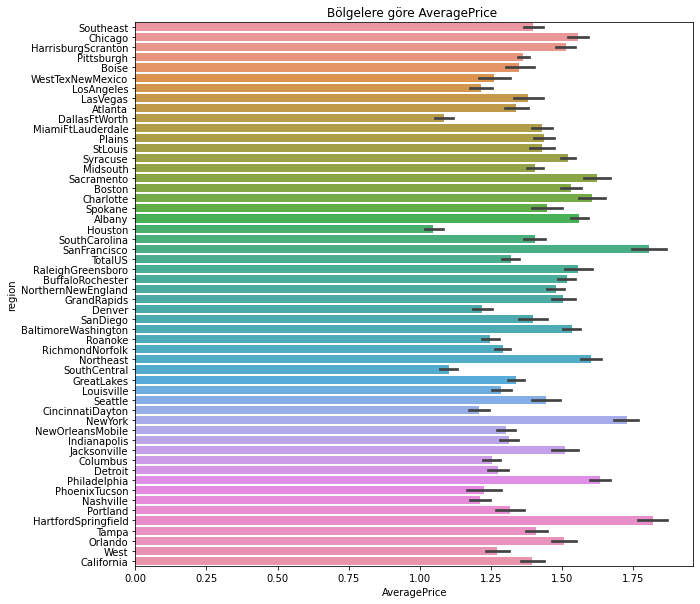

In [19]:
plt.figure(figsize=(10,10))
plt.title("Bölgelere göre AveragePrice ")
sns.barplot(x="AveragePrice",y="region",data=data)



In [24]:
data['year'].value_counts()
# 2018 yılı dışında yılların dağılımı eşit

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

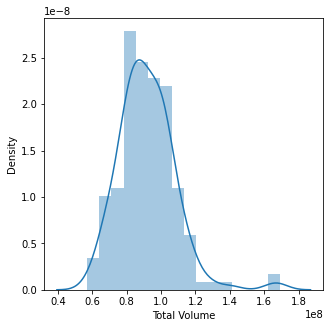

In [28]:
# burada değişkenlerin dağılımlarını daha iyi anlayabilmek için yeniden
#örneklediğimiz veri seti üzerinde görselleştirme yapıyoruz
plt.figure(figsize = (5,5))

sns.distplot(df1['Total Volume'])

plt.show()


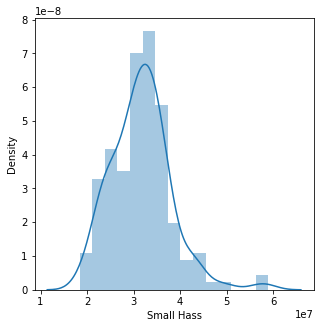

In [29]:
plt.figure(figsize = (5,5))

sns.distplot(df1["Small Hass"])
plt.show()


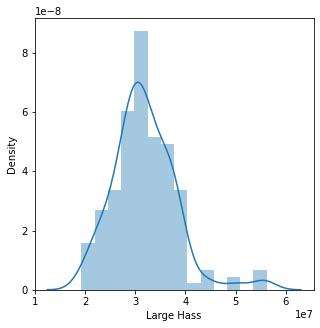

In [30]:
plt.figure(figsize = (5,5))

sns.distplot(df1["Large Hass"])
plt.show()


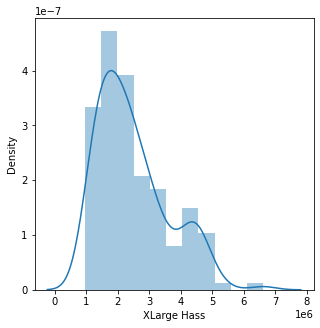

In [31]:
plt.figure(figsize = (5,5))

sns.distplot(df1["XLarge Hass"])
plt.show()


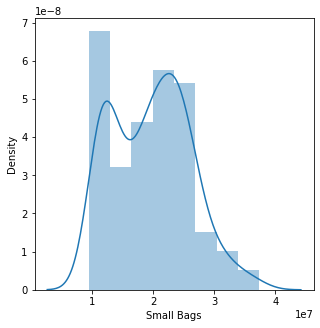

In [32]:
plt.figure(figsize = (5,5))

sns.distplot(df1["Small Bags"])
plt.show()


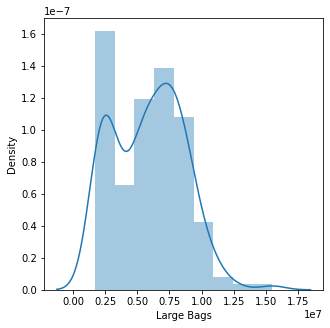

In [33]:
plt.figure(figsize = (5,5))

sns.distplot(df1["Large Bags"])
plt.show()


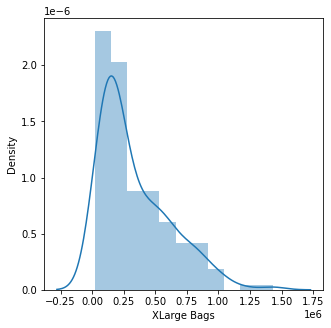

In [34]:
plt.figure(figsize = (5,5))

sns.distplot(df1["XLarge Bags"])
plt.show()


Toplam Hacim, Small Hass ve Large Hass türü normal dağılıma sahip.
XLarge Hass, Small Bags ve Large Bags çift tepeye saip.
XLarge Bags ise Sağa Çarpık Dağılım gösteriyor.

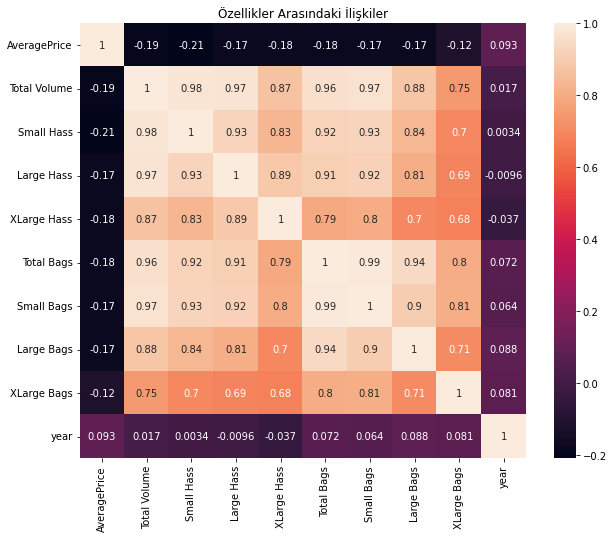

In [35]:
corr_matrisi=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrisi, annot=True)
plt.title("Özellikler Arasındaki İlişkiler")
plt.show()

In [36]:
# makine öğrenmesi modeli kurmadan önce  kategorik olan değişkenleri sayısal
#biçime dönüştürüyoruz
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data['type']= label_encoder.fit_transform(data['type'])  
data['type'].unique()

array([1, 0])

In [37]:
label_encoder = preprocessing.LabelEncoder()
data['region']= label_encoder.fit_transform(data['region'])  
data['region'].unique()

array([46,  8, 16, 34,  3, 53, 22, 21,  1, 11, 24, 35, 48, 49, 25, 40,  4,
        7, 47,  0, 18, 44, 42, 51, 37,  5, 30, 14, 12, 41,  2, 39, 38, 29,
       45, 15, 23, 43,  9, 28, 27, 19, 20, 10, 13, 32, 33, 26, 36, 17, 50,
       31, 52,  6])

In [38]:
label_encoder = preprocessing.LabelEncoder()
data['year']= label_encoder.fit_transform(data['year'])  
data['year'].unique()

array([0, 1, 2, 3], dtype=int64)

In [39]:
# bağımlı ve bağımsız değişkenleri ayırıyorum
y = data['AveragePrice']
X = data.drop(['AveragePrice','Date','year','Small Hass','Large Hass','XLarge Hass','Small Bags','Large Bags','XLarge Bags'], axis=1)


In [41]:
data.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
Small Hass             float64
Large Hass             float64
XLarge Hass            float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                     int32
year                     int64
region                   int32
dtype: object

In [40]:
# veri setini eğitim ve test olarak bölüyorum
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42)

In [42]:
# regresyon modellerimi oluşturuyorum

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr= LinearRegression()
lr.fit(X_train, y_train)
y_pred0 = lr.predict(X_test)
r2_score(y_test, y_pred0)

0.36282696831542216

In [45]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
r2_score(y_test, y_pred1)

0.36282696831542216

In [46]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=3, solver="cholesky")
ridge_reg.fit(X_train, y_train)
y_pred3 = ridge_reg.predict(X_test)
r2_score(y_test, y_pred3)

0.3628582889657145

In [47]:
from xgboost import XGBRegressor

XGBR = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.8, colsample_bytree=0.8)
XGBR.fit(X_train, y_train)
y_pred4 = XGBR.predict(X_test)
r2_score(y_test, y_pred4)

0.7068605461330214

In [48]:
# temel bileşen analizi yaparsak
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

X_train_cut, X_test_cut, y_train_cut, y_test_cut = train_test_split(pca.fit_transform(X), y, test_size=0.33, random_state=0)


from xgboost import XGBRegressor

pipe3 = Pipeline([('scaler', StandardScaler()), ('xgb', XGBRegressor())])
pipe3.fit(X_train_cut, y_train_cut)
y_pred3 = pipe3.predict(X_test_cut)
r2_score(y_test_cut, y_pred3)

0.7340741428208559